# **Module 6: Descriptive and Predictive Modeling**
## **Exercise 2:** A complete, non-guided Data Mining pipeline 
### **Submitted by:** Vitor Oliveira de Souza (), Jorge De La Torre García (), Lydia Phoebe Amanda Lilius (), Miguel Galán Cisneros ()
### **Date:** 26/02/2024

#### We have selected the Bank Marketing Dataset from UCI Repository
##### https://archive.ics.uci.edu/dataset/222/bank+marketing (bank.csv)
##### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [1]:
#Importing required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from datetime import datetime
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler

#### Loading the Dataset
##### Since the dataset download is a .zip with different versions, we will start with the shortest one to avoid long training processes.

In [2]:
#Loading the Dataset
data=pd.read_csv("../data/bank.csv",sep=';')

#### First data exploration and Pre-processing
##### In this section we will perform a scan of the data while processing them to check for missing values, remove outliers, convert values to numerical values, etc.

In [3]:
# Take a look in input data
data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

##### We found 15 features
#### Variables description (From UCI repository)
##### age
##### job -> Occupation. Type of job
##### marital -> marital status
##### education -> Education Level
##### default -> has credit in default?
##### balance -> average yearly balance
##### housing -> has housing loan?
##### loan -> has personal loan?
##### contact -> contact communication type
##### day -> last contact day of the week
##### month -> last contact month of year
##### duration -> last contact duration, in seconds
##### campaign -> number of contacts performed during this campaign and for this client
##### pdays -> number of days that passed by after the client was last contacted from a previous campaign
##### previous -> number of contacts performed before this campaign and for this client
##### poutcome -> outcome of the previous marketing campaign
##### y -> has the client subscribed a term deposit?

In [4]:
# Analyse input data distribution
data.describe(include='all')

age         job  marital  education default       balance  \
count   4521.000000        4521     4521       4521    4521   4521.000000   
unique          NaN          12        3          4       2           NaN   
top             NaN  management  married  secondary      no           NaN   
freq            NaN         969     2797       2306    4445           NaN   
mean      41.170095         NaN      NaN        NaN     NaN   1422.657819   
std       10.576211         NaN      NaN        NaN     NaN   3009.638142   
min       19.000000         NaN      NaN        NaN     NaN  -3313.000000   
25%       33.000000         NaN      NaN        NaN     NaN     69.000000   
50%       39.000000         NaN      NaN        NaN     NaN    444.000000   
75%       49.000000         NaN      NaN        NaN     NaN   1480.000000   
max       87.000000         NaN      NaN        NaN     NaN  71188.000000   

       housing  loan   contact          day month     duration     campaign  \
count     4521  4521      4521  4521.000000  4521  4521.000000  4521.000000   
unique       2     2         3          NaN    12          NaN          NaN   
top        yes    no  cellular          NaN   may          NaN          NaN   
freq      2559  3830      2896          NaN  1398          NaN          NaN   
mean       NaN   NaN       NaN    15.915284   NaN   263.961292     2.793630   
std        NaN   NaN       NaN     8.247667   NaN   259.856633     3.109807   
min        NaN   NaN       NaN     1.000000   NaN     4.000000     1.000000   
25%        NaN   NaN       NaN     9.000000   NaN   104.000000     1.000000   
50%        NaN   NaN       NaN    16.000000   NaN   185.000000     2.000000   
75%        NaN   NaN       NaN    21.000000   NaN   329.000000     3.000000   
max        NaN   NaN       NaN    31.000000   NaN  3025.000000    50.000000   

              pdays     previous poutcome     y  
count   4521.000000  4521.000000     4521  4521  
unique          NaN          NaN        4     2  
top             NaN          NaN  unknown    no  
freq            NaN          NaN     3705  4000  
mean      39.766645     0.542579      NaN   NaN  
std      100.121124     1.693562      NaN   NaN  
min       -1.000000     0.000000      NaN   NaN  
25%       -1.000000     0.000000      NaN   NaN  
50%       -1.000000     0.000000      NaN   NaN  
75%       -1.000000     0.000000      NaN   NaN  
max      871.000000    25.000000      NaN   NaN

#### Note: Pdays -1 means client was not previously contacted

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


##### Apparently there are no missing values, null or NaN

In [6]:
data.apply(pd.unique)

age          [30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 5...
job          [unemployed, services, management, blue-collar...
marital                            [married, single, divorced]
education              [primary, secondary, tertiary, unknown]
default                                              [no, yes]
balance      [1787, 4789, 1350, 1476, 0, 747, 307, 147, 221...
housing                                              [no, yes]
loan                                                 [no, yes]
contact                         [cellular, unknown, telephone]
day          [19, 11, 16, 3, 5, 23, 14, 6, 17, 20, 13, 30, ...
month        [oct, may, apr, jun, feb, aug, jan, jul, nov, ...
duration     [79, 220, 185, 199, 226, 141, 341, 151, 57, 31...
campaign     [1, 4, 2, 5, 3, 6, 18, 10, 9, 7, 12, 14, 13, 2...
pdays        [-1, 339, 330, 176, 147, 241, 152, 105, 342, 1...
previous     [0, 4, 1, 3, 2, 5, 20, 7, 6, 10, 9, 8, 18, 19,...
poutcome                    [unknown, failure, other, s

##### It is observed that an important part of the characteristics are categorical or binary. This is important when selecting predictive models.

Text(0.5, 1.0, 'y')

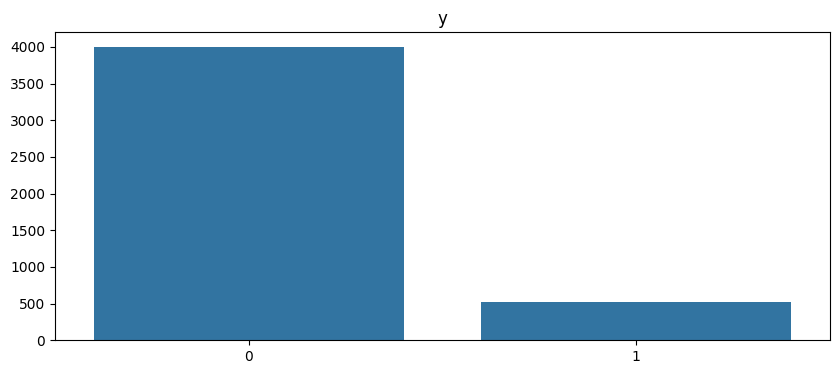

In [7]:
#The classes have been represented to check if the dataset is balanced.
plt.figure(figsize=(10,4))
sns.barplot(data['y'].value_counts().values)
plt.title('y')

##### A representation of the two classes shows that the dataset is clearly unbalanced.

##### Let's clean the outliers

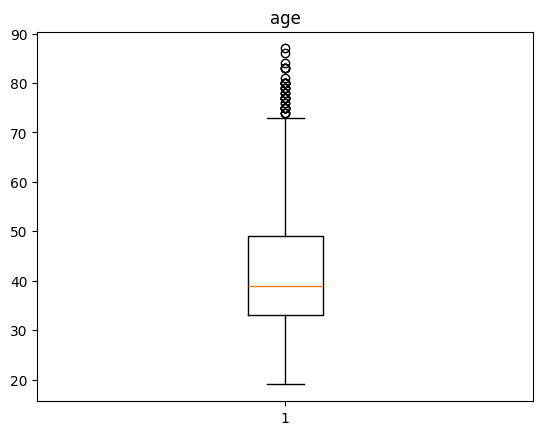

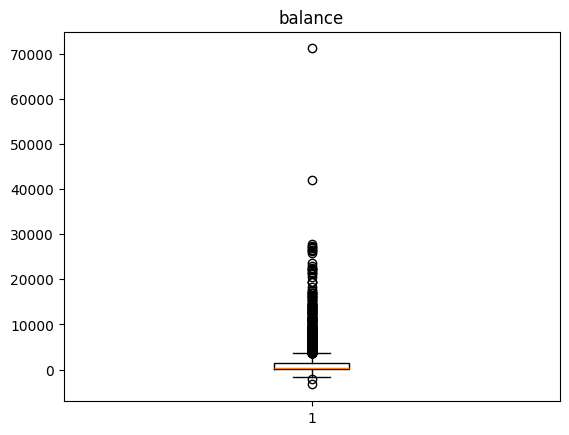

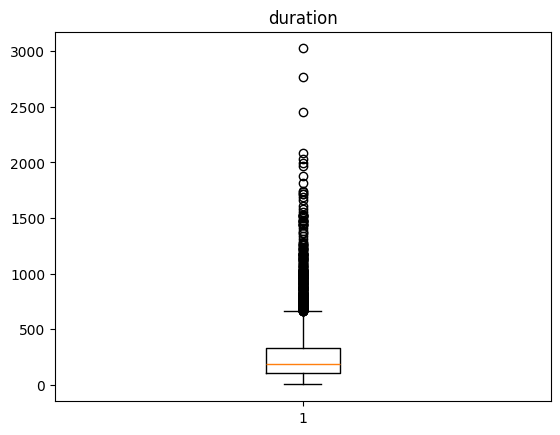

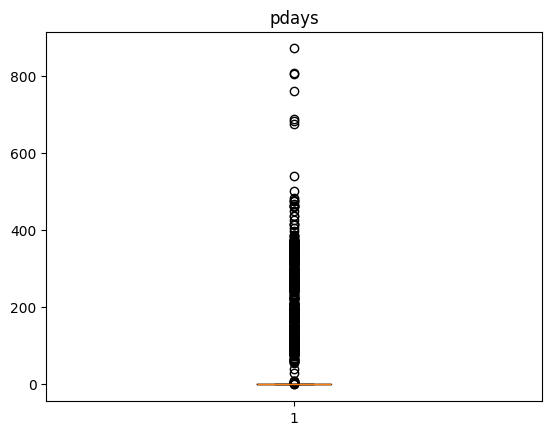

In [8]:
# Variables with possible outliers have been plotted according to the table above
col=data[['age','balance','duration','pdays']]
for column in col:
    plt.boxplot(data[column])
    plt.title(column)
    plt.show()

#### The boxplots show that ther are values out of range, but they are not necessarily outliers due to the nature of the data and the fact that it is unbalanced.
#### We will remove the most extreme values from the balance variable.

In [9]:
data = data[data['balance'] <= 40000]

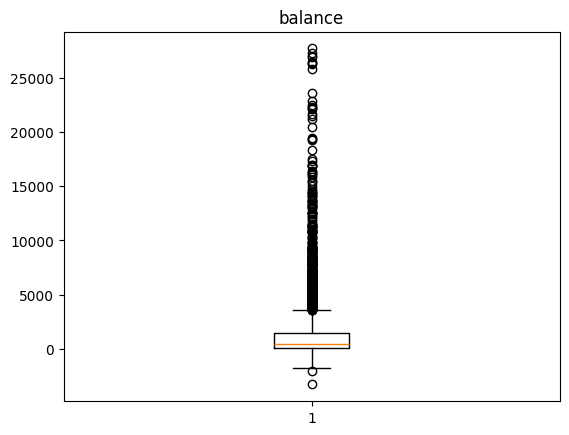

In [10]:
plt.boxplot(data['balance'])
plt.title('balance')
plt.show()

### Analysis:
#### pdays has a very odd distribution, let's further explore it's values by visualyzing it.

<Axes: ylabel='Frequency'>

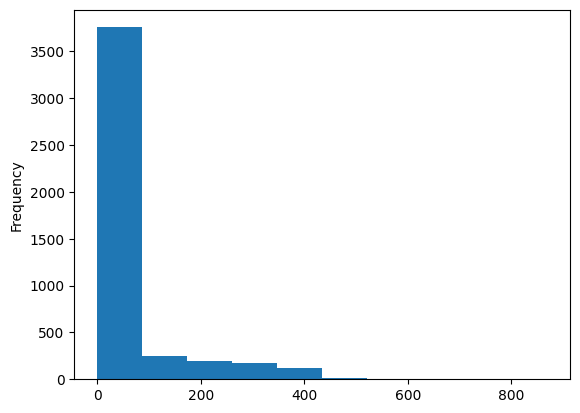

In [11]:
pdays = data[['pdays','y']].sort_values(by='pdays', ascending=True).reset_index()
pdays['y'] = pdays['y'].map(lambda x: 0 if x == 'no' else 1)
pdays['pdays'].plot.hist()

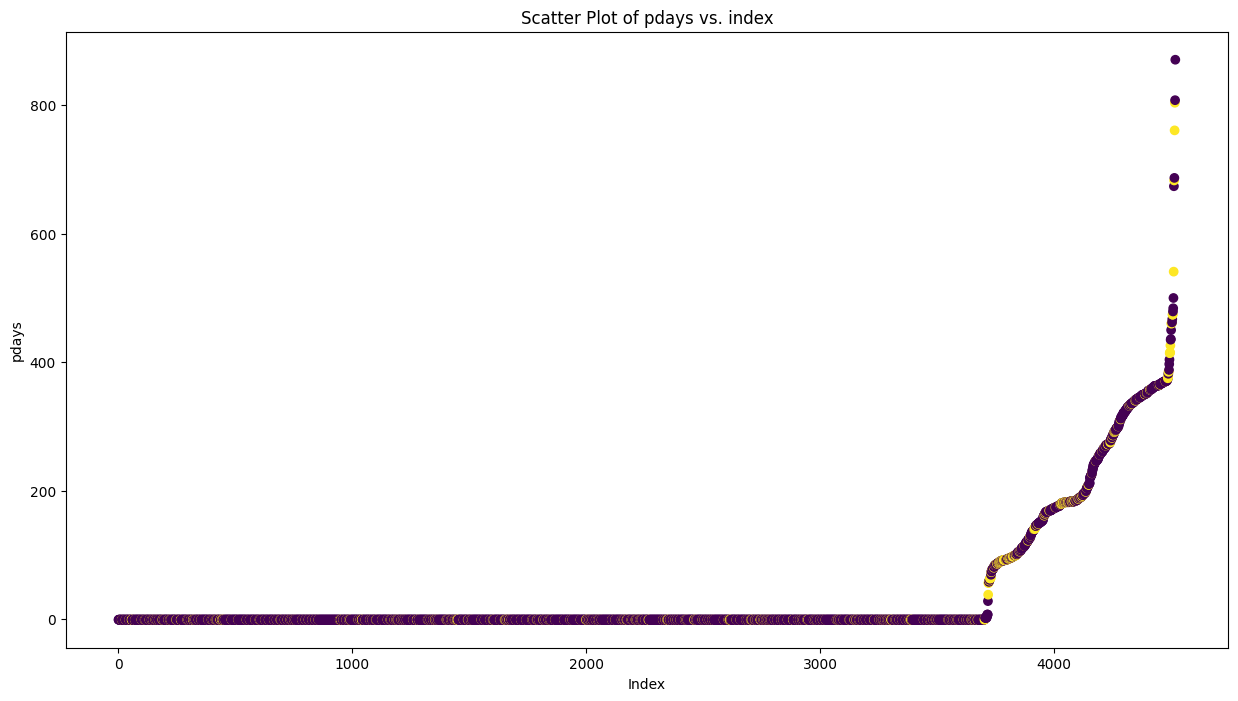

In [12]:
# Lets analyse it's scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(x=pdays.index,y=pdays['pdays'],cmap='viridis',c=pdays['y'],label='y')
plt.title('Scatter Plot of pdays vs. index')
plt.xlabel('Index')
plt.ylabel('pdays')
plt.show()

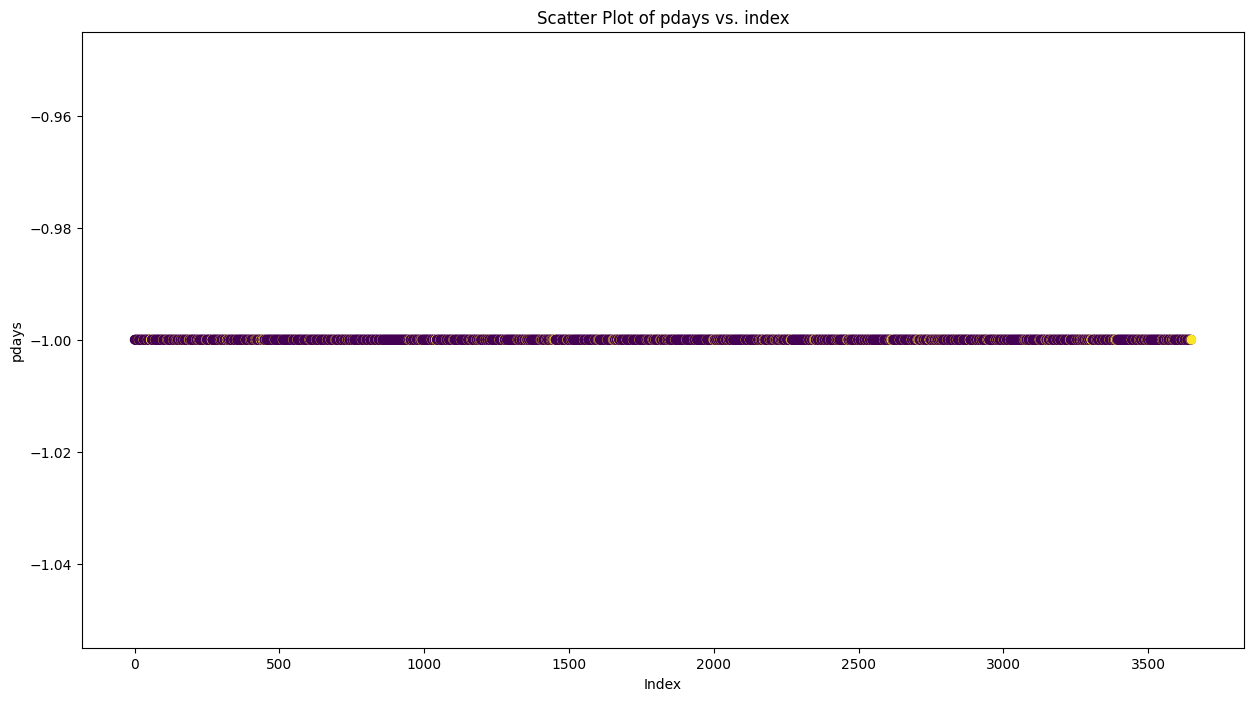

In [13]:
# Let's check only the first 3650 points
plt.figure(figsize=(15, 8))
plt.scatter(x=pdays.index[:3650],y=pdays['pdays'][:3650],cmap='viridis',c=pdays['y'][:3650],label='y')
plt.title('Scatter Plot of pdays vs. index')
plt.xlabel('Index')
plt.ylabel('pdays')
plt.show()

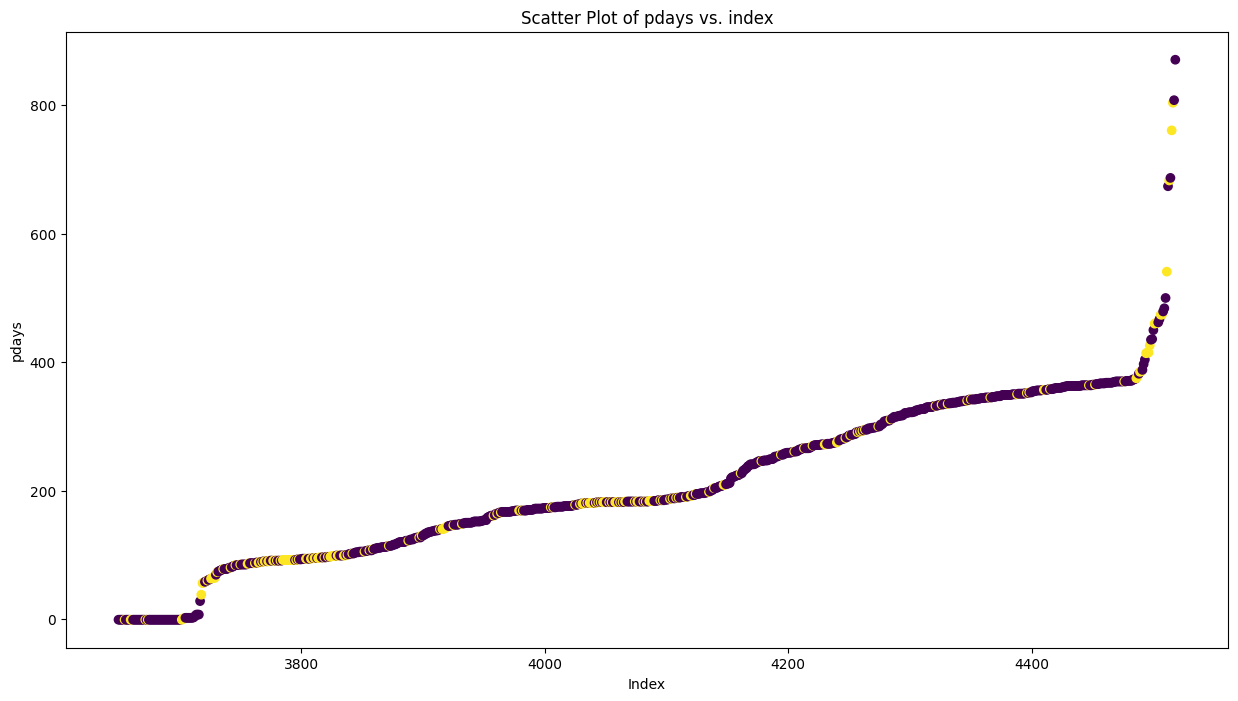

In [14]:
# Let's check only the last points
plt.figure(figsize=(15, 8))
plt.scatter(x=pdays.index[3650:],y=pdays['pdays'][3650:],cmap='viridis',c=pdays['y'][3650:],label='y')
plt.title('Scatter Plot of pdays vs. index')
plt.xlabel('Index')
plt.ylabel('pdays')
plt.show()

In [15]:
from scipy.stats import pointbiserialr

# Let's check correlation with this variable and the output
correlation, p_value = pointbiserialr(pdays['pdays'], pdays['y'])
print(f"All data Point-Biserial Correlation coefficient: {correlation}")
print(f"All data P-value: {p_value}")

correlation, p_value = pointbiserialr(pdays['pdays'][3650:], pdays['y'][3650:])
print(f"Not -1 Point-Biserial Correlation coefficient: {correlation}")
print(f"Not -1 P-value: {p_value}")

All data Point-Biserial Correlation coefficient: 0.10402859169309313
All data P-value: 2.3787744549166183e-12
Not -1 Point-Biserial Correlation coefficient: -0.08891930497774302
Not -1 P-value: 0.008724665616582349


In [16]:
pdays['group'] = pdays['pdays'].apply(lambda x: 'Is -1' if x == -1 else 'Not -1')
contingency_table = pd.crosstab(pdays['group'], pdays['y'])
contingency_table

y          0    1
group            
Is -1   3366  337
Not -1   632  184

In [17]:
from scipy.stats import chi2_contingency

# Let's check if there's statistical difference beteween -1 or not -1 groups 
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test p-value: {p}")
if p < 0.05:
    print("There is a statistically significant association between the group and output 'y'.")
else:
    print("There is no statistically significant association between the group and output 'y'.")

Chi-square test p-value: 2.5362631925973967e-27
There is a statistically significant association between the group and output 'y'.


### Conclusion:
##### There's a strong assiciation between the pdays feature and the output.
##### We're going to replace pdays feature in our dataset by categoryzing it between -1 (0) or not -1 (1) (binary category)

### Now Transform categorical values to numeric type by hand or with LabelEncoder in order to perform further analysis
#####  We're only using this data for analysis
#####  For model training we're going to build a transformation Pipeline with OneHotEncoder

In [19]:
analysis_data = data.copy()

analysis_data.loc[:, ['default', 'housing', 'loan', 'y']] = analysis_data.loc[:, ['default', 'housing', 'loan', 'y']].replace(["no", "yes"], ["0", "1"])

analysis_data['month'] = analysis_data['month'].replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])

le = preprocessing.LabelEncoder()

analysis_data['job'] = le.fit_transform(analysis_data['job'])
analysis_data['marital'] = le.fit_transform(analysis_data['marital'])
analysis_data['education'] = le.fit_transform(analysis_data['education'])
analysis_data['contact'] = le.fit_transform(analysis_data['contact'])
analysis_data['poutcome'] = le.fit_transform(analysis_data['poutcome'])

analysis_data.head() # As a check

age  job  marital  education default  balance housing loan  contact  day  \
0   30   10        1          0       0     1787       0    0        0   19   
1   33    7        1          1       0     4789       1    1        0   11   
2   35    4        2          2       0     1350       1    0        0   16   
3   30    4        1          2       0     1476       1    1        2    3   
4   59    1        1          1       0        0       1    0        2    5   

  month  duration  campaign  pdays  previous  poutcome  y  
0    10        79         1     -1         0         3  0  
1     5       220         1    339         4         0  0  
2     4       185         1    330         1         0  0  
3     6       199         4     -1         0         3  0  
4     5       226         1     -1         0         3  0

### Relationship between variables
##### The variables have been plotted to show the relationship between the features and with the categories.

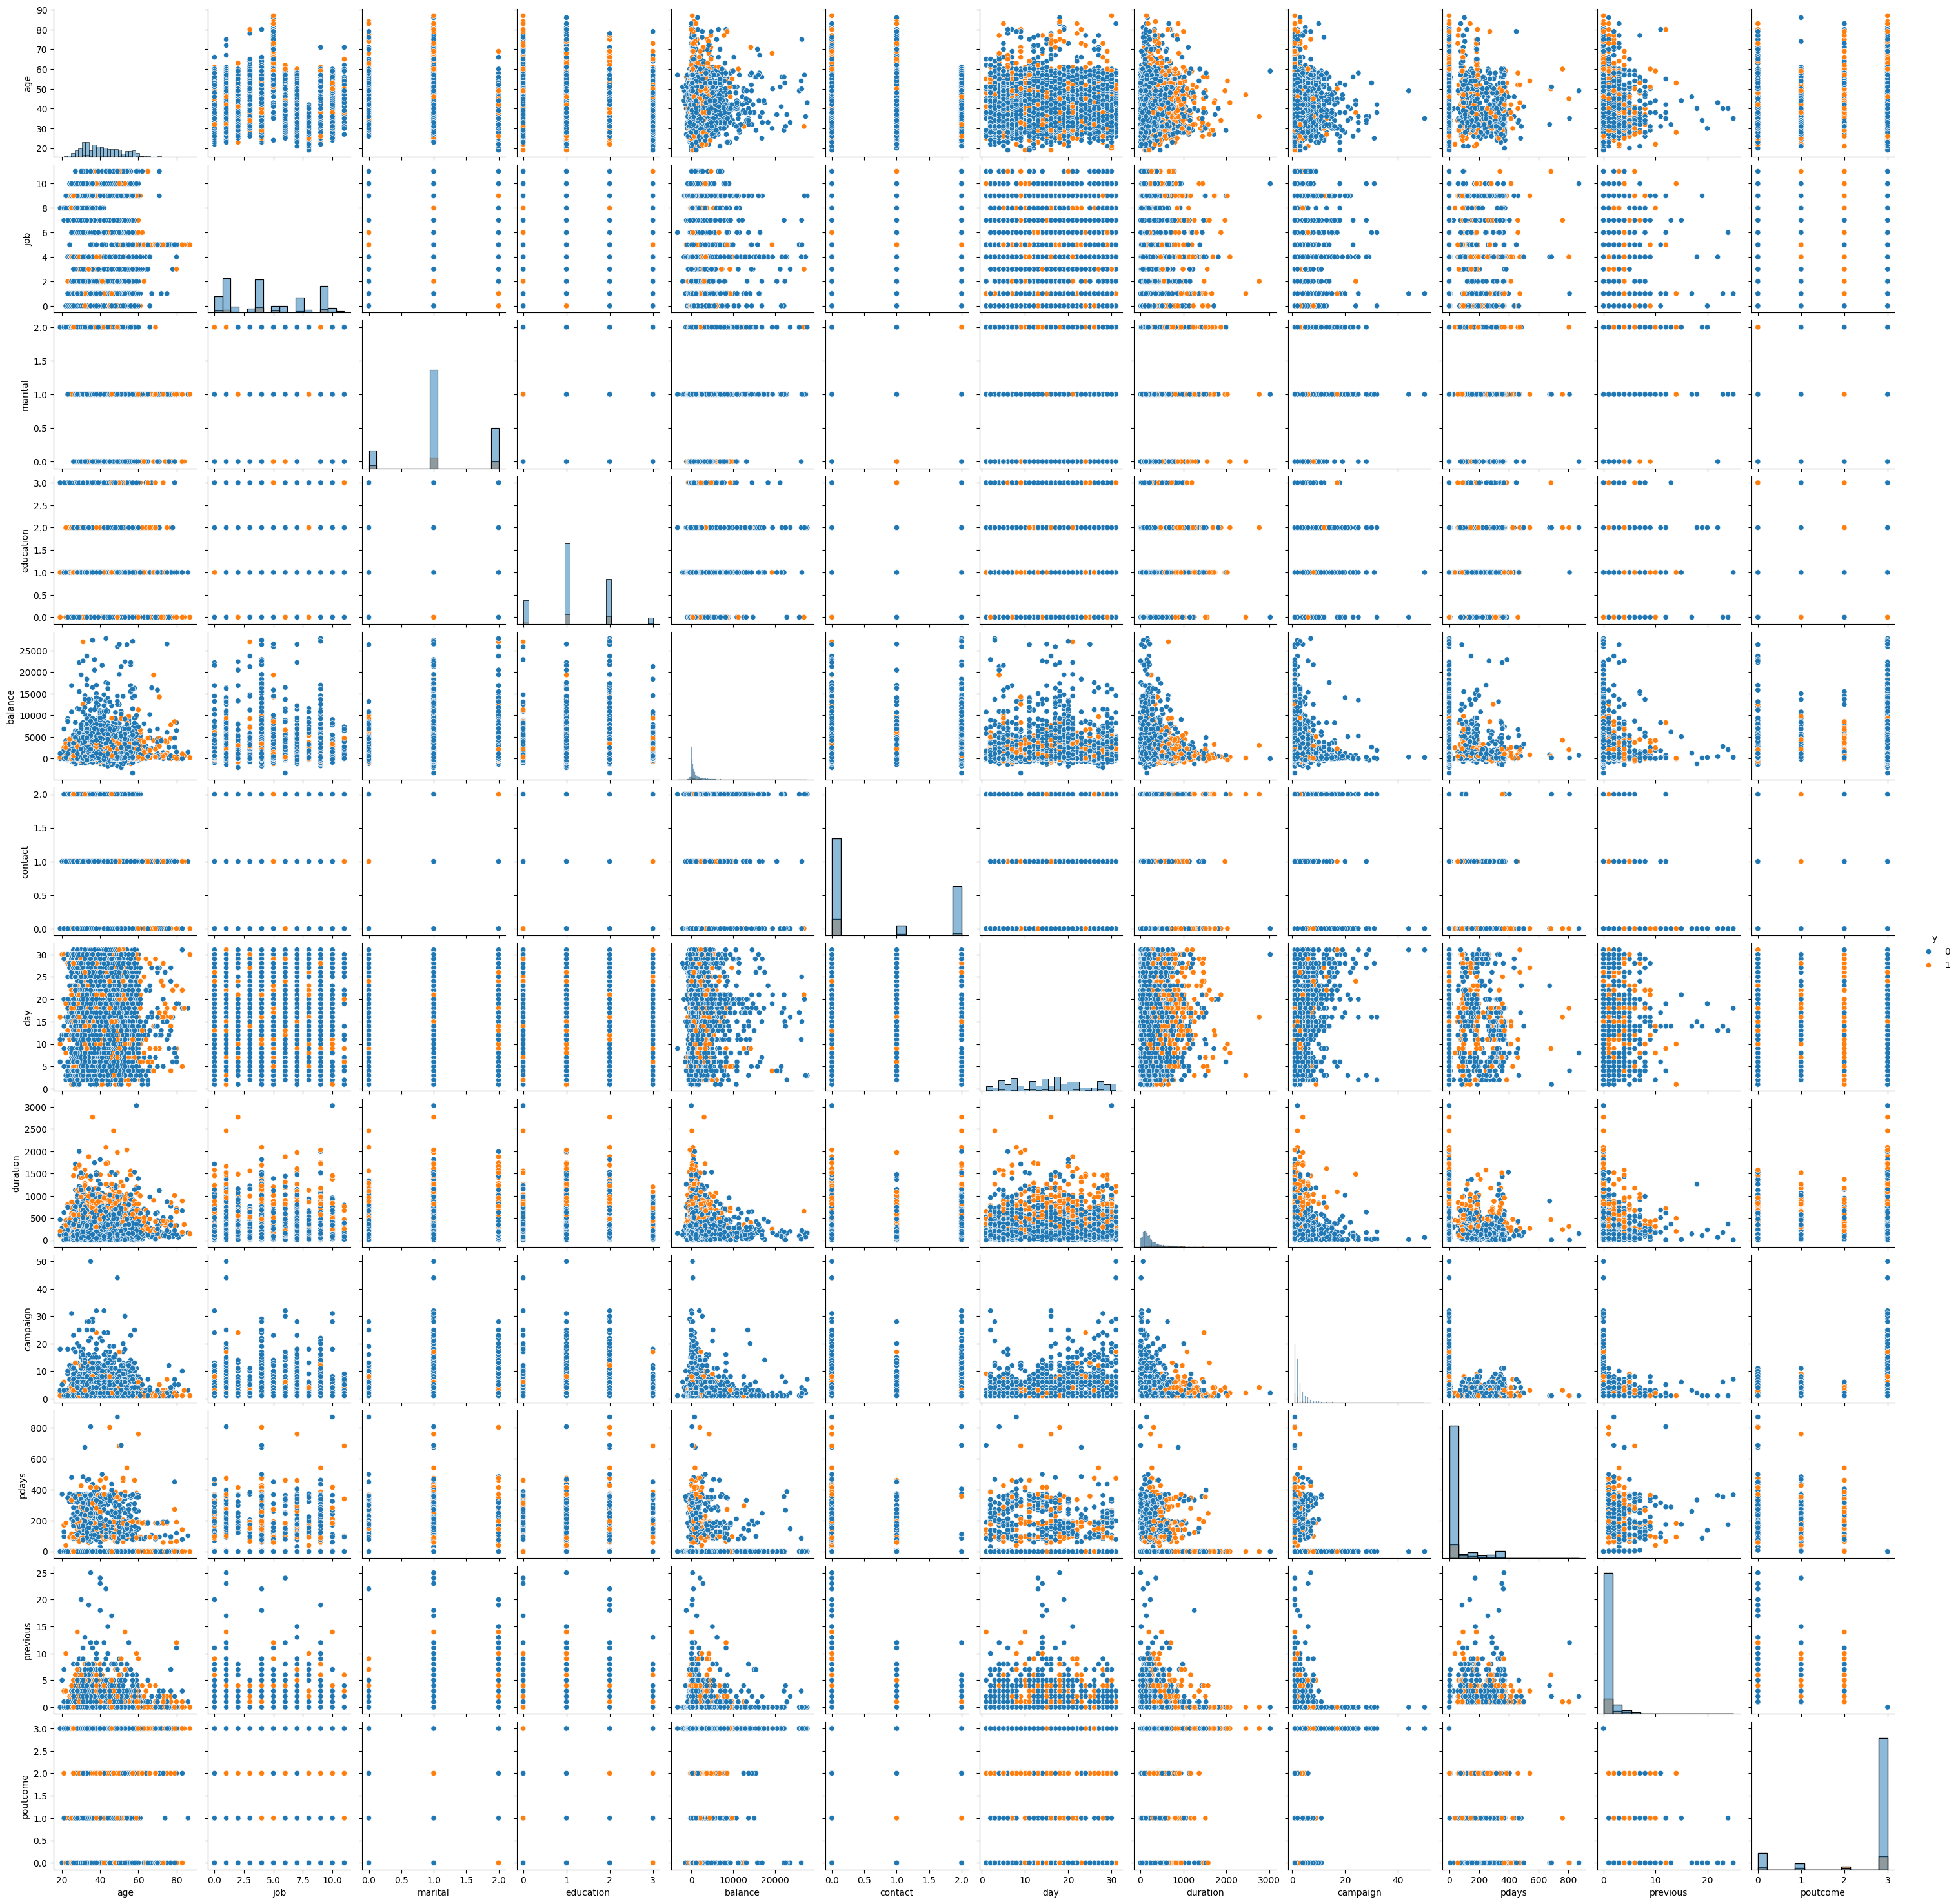

In [21]:
sns.pairplot(analysis_data, hue="y",diag_kind="hist")
plt.savefig('pairplot.png')
plt.show()

#### Let's represent the correlation matrix

<Axes: >

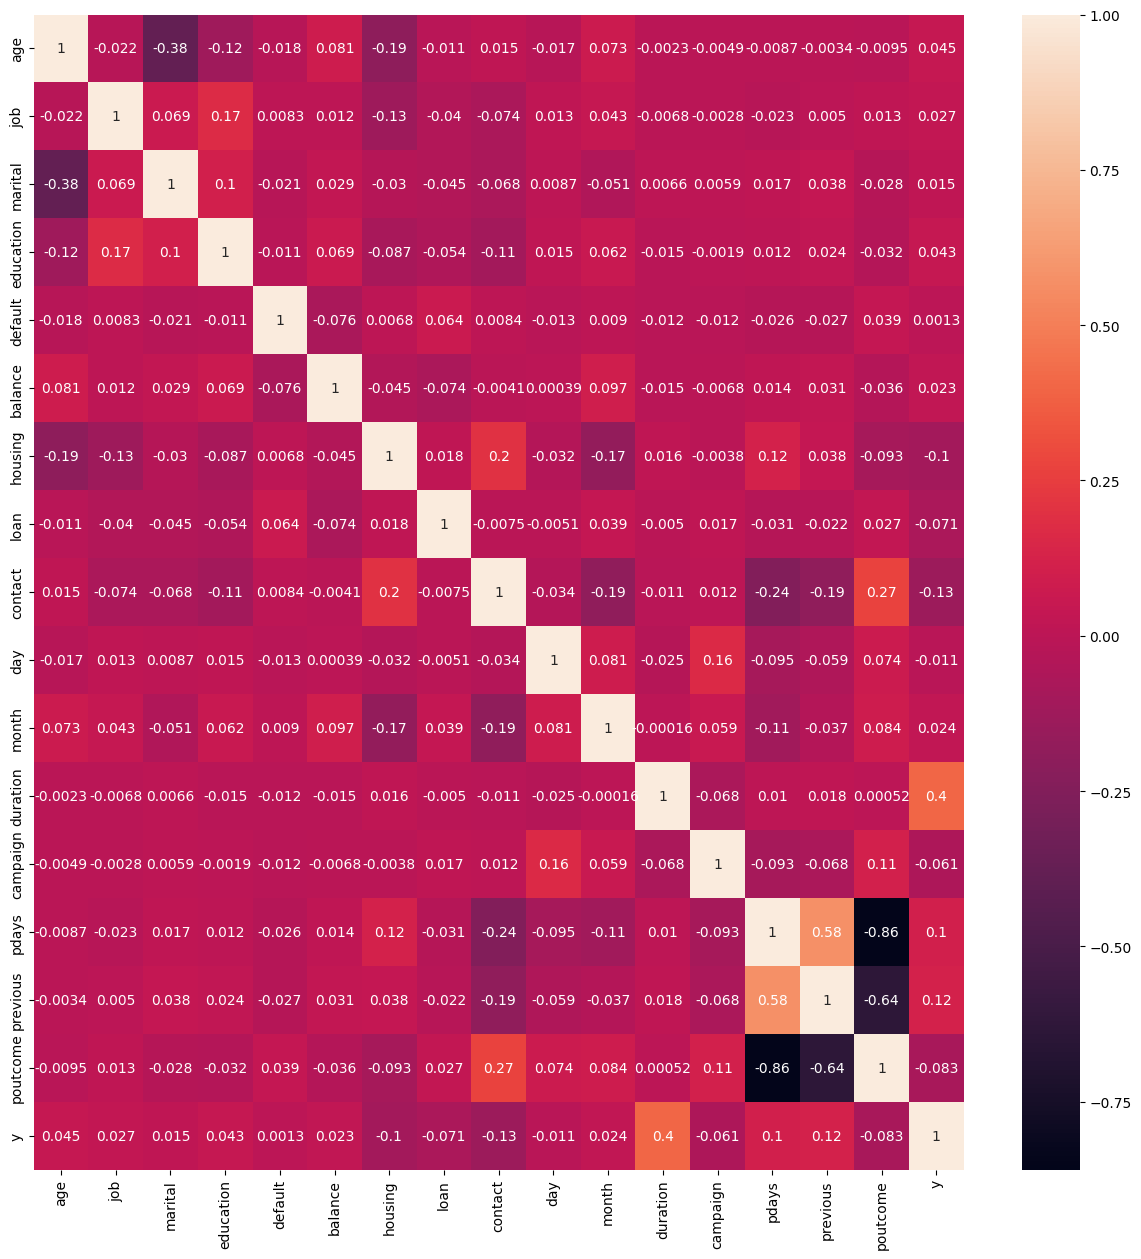

In [23]:
# Through the correlation matrix we can see the relationship of the variables
# the most important in the customer's subscription decision being the duration of the call
corr = analysis_data.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, ax=ax, annot=True)

##### The highest correlation is between pday and previous
##### The most important in the customer's underwriting decision is call duration. This can be seen both in the correlation matrix and in the pairwise relationship graph.

### Let's separate characteristics and target variable

In [25]:
X = data.drop(columns='y')
X.head() # As a check

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  
0  cellular   19   oct        79         1     -1         0  unknown  
1  cellular   11   may       220         1    339         4  failure  
2  cellular   16   apr       185         1    330         1  failure  
3   unknown    3   jun       199         4     -1         0  unknown  
4   unknown    5   may       226         1     -1         0  unknown

In [26]:
y = data['y']
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

### Principal Component Analysis

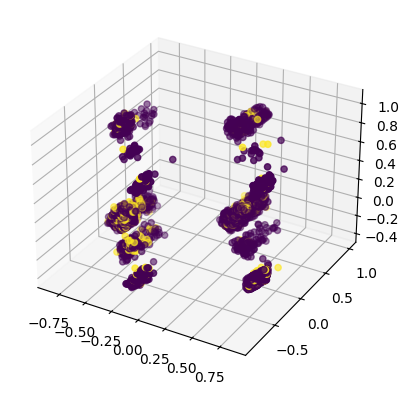

In [41]:
# Scale
scaler = MinMaxScaler()
Xscaled = pd.DataFrame(scaler.fit_transform(analysis_data.drop(columns='y')),columns=X.columns)

#PCA 3d
miPCA = PCA(n_components=3)
miPCA.fit(Xscaled)
Xpca = miPCA.transform(Xscaled)

fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.scatter(Xpca[:,0],Xpca[:,1],Xpca[:,2],c=y.map(lambda x: 0 if x == 'no' else 1))
plt.savefig('PCA_init_3d.png')

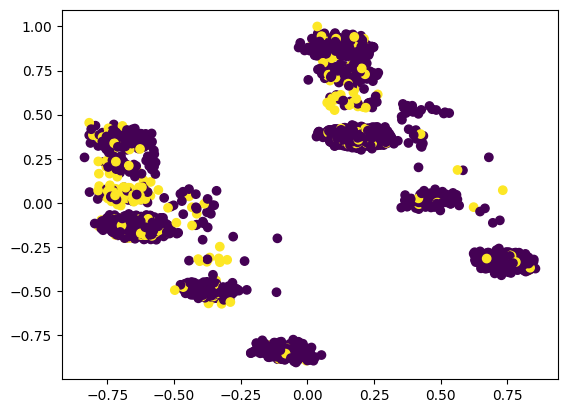

In [42]:
#PCA 2d
miPCA = PCA(n_components=2)
miPCA.fit(Xscaled)
Xpca = miPCA.transform(Xscaled)

fig = plt.figure()
plt.scatter(Xpca[:,0],Xpca[:,1],c=y.map(lambda x: 0 if x == 'no' else 1))

plt.savefig('PCA_init_2d.png')

In [43]:
# As a summary...
num_features = X.shape[1]
print("Number of features: ", num_features)

num_samples = X.shape[0]
print("Number of samples: ", num_samples)

num_categories = len(set(y))
print("Number of categories: ", num_categories)

samples_per_category = y.value_counts()

print("Number of samples per category: ", samples_per_category)

Number of features:  16
Number of samples:  4519
Number of categories:  2
Number of samples per category:  y
no     3998
yes     521
Name: count, dtype: int64


### Splitting
##### Now we create a splitter to split the data considering the classes

In [45]:
# Now we create a splitter to split the data considering the classes
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=0)

# At this point y values are still categorical yes or nos
# Lets convert them into numbers
y = y.replace({'yes': 1, 'no': 0}).astype('int16')

for train_index, test_index in sss.split(X, y): 
    Xtrain, ytrain = X.iloc[train_index], y.iloc[train_index]
    Xtest, ytest = X.iloc[test_index], y.iloc[test_index]

C:\Users\vos_v\AppData\Local\Temp\ipykernel_10472\2776143779.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'yes': 1, 'no': 0}).astype('int16')


### Create transformer elements for Pipeline (feature engineering)

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# pdays Transformer to encode this feature in 0 and 1 according to its values
class PDaysTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column 
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.column in X.columns:
            X_transformed = X.copy()
            X_transformed[self.column] = np.where(X_transformed[self.column] == -1, 0, 1)
            return X_transformed
        else:
            raise ValueError(f"Column {self.column} not found in DataFrame")

# Binary transformer to columns that are "no" and "yes"
pd.set_option('future.no_silent_downcasting', True)
def binary_transform(df):
    return df.replace({"no": 0, "yes": 1})

# Transform months into numbers
def month_transform(df):
    months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
    return df.replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])

# Create a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', FunctionTransformer(binary_transform), ['default', 'housing', 'loan']),
        ('month', FunctionTransformer(month_transform), ['month']),
        ('job_enc', OneHotEncoder(), ['job']), 
        ('marital_enc', OneHotEncoder(), ['marital']),
        ('education_enc', OneHotEncoder(), ['education']),
        ('contact_enc', OneHotEncoder(), ['contact']),
        ('poutcome_enc', OneHotEncoder(), ['poutcome']),
    ],
    remainder='passthrough'
)

## Model training
#### We will test different machine learning models

### Support Vector Machine (SVC)
#### This model has been tested because with the Gaussian Kernel (rbf) it could be a good model for our problem.

In [ ]:
from sklearn.svm import SVC

# Create the pipeline
estimator_SVC = Pipeline([
    ('binary_transform', PDaysTransformer(column='pdays')),
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('SVC', SVC())
])

# We will use a stratified cross-validation
param_grid_SVC = {
    'SVC__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'SVC__kernel': ['linear', 'rbf',],
    'SVC__gamma': ['scale', 'auto']
}
param_grid_SVC = {
    'SVC__C': [100, 500, 1000],
    'SVC__kernel': ['linear', 'rbf',],
    'SVC__gamma': ['scale', 'auto']
}
# We will use a stratified cross-validation
cv_stratified_SVC = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# We will use a grid search to find the best hyperparameters for the model
# Given the unbalanced dataset we have, we're going to use f1 score in the cross validation process
gscv_strat_SVC = GridSearchCV(
    estimator_SVC,
    param_grid_SVC,
    scoring="f1",
    cv=cv_stratified_SVC,
    verbose=2,
    n_jobs=-1
)

gscv_strat_SVC.fit(Xtrain, ytrain)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [ ]:
# Lest's see the best estimator and the evaluation metrics
best_estimator_SVC = gscv_strat_SVC.best_estimator_
print (gscv_strat_SVC.best_params_)
ypred_SVC = best_estimator_SVC.predict(Xtest)
# Calculate and print accuracy metric
accuracy_SVC = accuracy_score(ytest, ypred_SVC)
print(f'Accuracy: \t{accuracy_SVC:.4f}')
# ROC AUC
AUC_SVC = roc_auc_score(ytest, ypred_SVC)
print(f'AUC: \t\t{AUC_SVC :.4f}')

# f1 score 
f1_SVC = f1_score(ytest, ypred_SVC, pos_label=1)
print(f'F1 score: \t{f1_SVC:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(ytest,ypred_SVC)
print('\nConfusion matrix values: \n', conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, vmax=90, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# ===================================================================================================
# VER DESPUES
# ===================================================================================================

data_transformer = Pipeline([
    ('binary_transform', PDaysTransformer(column='pdays')),
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler())
])

train = data_transformer.fit_transform(Xtest)
teste = data_transformer.transform(Xtest)

# Let's represent the decision regions of the SVC model 
miPCA = PCA(n_components=2)
XtrainPCA = miPCA.fit_transform(Xtrain)
Xpcatest = miPCA.transform(Xtest)

x0_min, x0_max = Xpcatest[:, 0].min() - 1, Xpcatest[:, 0].max() 
x1_min, x1_max = Xpcatest[:, 1].min() - 1, Xpcatest[:, 1].max() 
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02),
                     np.arange(x1_min, x1_max, 0.02))

Xtest_all = np.c_[xx0.ravel(), xx1.ravel()]
Xtest_all_invPCA = miPCA.inverse_transform(Xtest_all)
ypred_all = best_estimator_SVC.predict(Xtest_all_invPCA)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Xtest_all[:,0],Xtest_all[:,1],c=ypred_all,s=50,alpha=0.5)

#### It is observed that the accuracy is good because the database is unbalanced and hits almost all the y=0 but for the y=1 it is only able to predict a small number.
#### The ROC AUC score is worse than the previous score, but since the data is very unbalanced we will look at the f1 score. The latter value is very low.

### Decision Tree
#### Considering that we have to classify and predict from mostly categorical variables, it can be a good model. Also, given the sector of the dataset, it is interesting how easy it is to understand the model if this work were to be carried out in a company.

In [ ]:
# Create the pipeline
estimator_tree = Pipeline([
    ('binary_transform', PDaysTransformer(column='pdays')),
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('DecisionTree', DecisionTreeClassifier())
])

param_grid_tree = {
    'DecisionTree__criterion': ['gini', 'entropy'],
    'DecisionTree__max_depth': [4, 6, 8, 10]  
}

cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gscv_strat_tree = GridSearchCV(
    estimator_tree,
    param_grid_tree,
    scoring='f1',
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

gscv_strat_tree.fit(Xtrain, ytrain)

In [ ]:
best_estimator_tree = gscv_strat_tree.best_estimator_
print(gscv_strat_tree.best_params_)

ypred_tree = best_estimator_tree.predict(Xtest)
# Calculate and print accuracy metric
accuracy_Tree = accuracy_score(ytest, ypred_tree)
print(f'Accuracy: \t{accuracy_Tree:.4f}')
# ROC AUC
AUC_Tree = roc_auc_score(ytest, ypred_tree)
print(f'AUC: \t\t{AUC_Tree:.4f}')

# f1 score 
f1_tree = f1_score(ytest, ypred_tree, pos_label=1)
print(f'F1 score: \t{f1_tree:.4f}')

# Confusion matrix
conf_matrix_tree = confusion_matrix(ytest, ypred_tree)
print('\nConfusion matrix values: \n', conf_matrix_tree)
# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_tree, annot=True, vmax=70, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##### The results obtained for the evaluation methods are better than those of the previous model, achieving correct results for a greater number of y=1.

In [ ]:
# Due to the fact that one of the advantages of the model is its compression, the decision tree has been represented as follows
fig = plt.figure(figsize=(25, 25))
tree.plot_tree(decision_tree=best_estimator_tree.named_steps['DecisionTree'], filled=True, rounded=True, fontsize=10,class_names=['0', '1'])
plt.savefig('decision_tree.png')#save the tree image in png format
plt.show()

### Random Forest
#### Given the decent performance of the Decision Tree model, Random Forest could be a suitable choice due to its ability to further improve predictive accuracy by aggregating multiple decision trees

In [ ]:
# Create the pipeline
estimator_RF = Pipeline([
    ('binary_transform', PDaysTransformer(column='pdays')),
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('RandomForest', RandomForestClassifier())
])


param_grid_RF = {
    'RandomForest__n_estimators': [50, 100, 200, 500],  
    'RandomForest__criterion': ['gini', 'entropy'],
    'RandomForest__min_samples_split': [2, 5, 10],
    'RandomForest__min_samples_leaf': [1, 2, 4],
}

cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gscv_strat_RF = GridSearchCV(
    estimator_RF,
    param_grid_RF,
    scoring='f1',
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

gscv_strat_RF.fit(Xtrain, ytrain)

In [ ]:
best_estimator_RF = gscv_strat_RF.best_estimator_
print(gscv_strat_RF.best_params_)

ypred_RF  = best_estimator_RF.predict(Xtest)
# Calculate and print accuracy metric
accuracy_RF = accuracy_score(ytest, ypred_RF )
print(f'Accuracy: \t{accuracy_RF:.4f}')
# ROC AUC
AUC_RF = roc_auc_score(ytest, ypred_RF )
print(f'AUC: \t\t{AUC_RF:.4f}')

# f1 score 
f1_RF  = f1_score(ytest, ypred_RF , pos_label=1)
print(f'F1 score: \t{f1_tree:.4f}')

# Confusion matrix
conf_matrix_RF = confusion_matrix(ytest, ypred_RF)
print('\nConfusion matrix values: \n', conf_matrix_RF)
# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_RF, annot=True, vmax=80, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##### Even though it is a more complex model than the decision tree, the results obtained with this model are worse than with a single decision tree.

### Note
#### It seems we're not being able to capture the pattern for the least representative class due to the data unbalacing characteristic.
#### There's a few strategies we can use to deal with unbalanced data:
##### - **Over-Sampling:** It consists in sampling data from the minority class untill reach a equal amount of examples with the other classes. This can be usefull but we need to be carefull because it can lead to overfitting during the training step. It's also important to oversampling after splitting the data into train and test in order to avoid data leak and artificially improve the performance.
##### - **Under-Sampling:** It's the opposite from over sampling, it means we throw away data from the mayority class until we have as few examples as the minority one. This is used when the amount of data won't affect the performance of the data and this examples loss will not be a problem during the trainning process. 
##### - **Collect more data:** In real scenarios this could make sense, but in our case it's not feaseble.
##### - **Use Robust Models:** Another strategy is to use robuts models that aren't affected by the unbalancing too much like: Gradient Boosting Machines and Anomaly Detection Models.

### Boosting
#### Given that the database is very unbalanced, a boosting method can be interesting for imbalanced data because it iteratively adjusts the weights of misclassified samples, focusing more on difficult-to-classify instances, potentially improving performance on the minority class.

### AdaBoost
#### An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. * From sklearn documentation
#### We will use this method with decision tree as a base method.

In [ ]:
ada_boost = AdaBoostClassifier(algorithm="SAMME",random_state=0)

param_grid_AB = {
    'estimator': [DecisionTreeClassifier(max_depth=4)], # From the Decision Tree model results
    'n_estimators': [50, 100, 150, 200],  
    'learning_rate': [0.1, 0.5, 1.0, 2.0]  
}

gscv_strat_AB = GridSearchCV(
    ada_boost,
    param_grid_AB,
    scoring="accuracy",
    cv=gscv_strat_tree.cv,
    verbose=2,
    n_jobs=-1
)

gscv_strat_AB.fit(Xtrain, ytrain)

In [ ]:
best_estimator_AB = gscv_strat_AB.best_estimator_
print(best_estimator_AB)

ypred_AB = best_estimator_AB.predict(Xtest)
# Calculate and print accuracy metric
accuracy_AB = accuracy_score(ytest, ypred_AB)
print(f'Accuracy: \t{accuracy_RF:.4f}')
# ROC AUC
AUC_AB = roc_auc_score(ytest, ypred_AB)
print(f'AUC: \t\t{AUC_AB:.4f}')

# f1 score 
f1_AB  = f1_score(ytest, ypred_AB , pos_label='1')
print(f'F1 score: \t{f1_AB:.4f}')

# Confusion matrix
conf_matrix_AB = confusion_matrix(ytest, ypred_AB)
print('\nConfusion matrix values: \n', conf_matrix_AB)
# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_AB, annot=True, vmax=70, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##### Although this model should fit the most difficult cases, the results are slightly worse when only the decision tree is used.

### Random Over-Sampling
#### Finally, we will repeat the first three models but manually balancing the dataset by Random Over-Sampling. This method consists of adding copies of the minority class. Random Over-Sampling is extracted from Imbalanced-learn, an MIT-licensed open source library based on scikit-learn that provides tools for classifying unbalanced classes. 

In [ ]:
os =  RandomOverSampler()
Xtrain_new,ytrain_new=os.fit_resample(Xtrain, ytrain) # We have balanced the dataset only for the training data

data_balanced = pd.DataFrame(Xtrain_new, columns=X.columns)
data_balanced['y'] = ytrain_new

plt.figure(figsize=(10, 4))
sns.countplot(x='y', data=data_balanced)
plt.title('y_new')
plt.show()

### SVM model

In [ ]:
gscv_strat_SVC_new = GridSearchCV(
    estimator_SVC,
    param_grid_SVC,
    scoring="f1",
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)
gscv_strat_SVC_new.fit(Xtrain_new,ytrain_new)

In [ ]:
best_estimator_SVC_new = gscv_strat_SVC_new.best_estimator_
print (best_estimator_SVC_new)
ypred_SVC_new = best_estimator_SVC_new.predict(Xtest)
# Calculate and print accuracy metric
accuracy_SVC_new = accuracy_score(ytest, ypred_SVC_new)
print(f'Accuracy: \t{accuracy_SVC_new:.4f}')
# ROC AUC
AUC_SVC_new = roc_auc_score(ytest, ypred_SVC_new)
print(f'AUC: \t\t{AUC_SVC_new :.4f}')

# f1 score 
f1_SVC_new  = f1_score(ytest, ypred_SVC_new , pos_label='1')
print(f'F1 score: \t{f1_SVC_new:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(ytest,ypred_SVC_new)
print('\nConfusion matrix values: \n', conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, vmax=90, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Let's represent the decision regions
miPCA = PCA(n_components=2)
XtrainPCA = miPCA.fit_transform(Xtrain_new)
Xpcatest = miPCA.transform(Xtest)

x0_min, x0_max = Xpcatest[:, 0].min() - 1, Xpcatest[:, 0].max() 
x1_min, x1_max = Xpcatest[:, 1].min() - 1, Xpcatest[:, 1].max() 
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02),
                     np.arange(x1_min, x1_max, 0.02))

Xtest_all = np.c_[xx0.ravel(), xx1.ravel()]
Xtest_all_invPCA = miPCA.inverse_transform(Xtest_all)
ypred_all = best_estimator_SVC_new.predict(Xtest_all_invPCA)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Xtest_all[:,0],Xtest_all[:,1],c=ypred_all,s=50,alpha=0.5)

#### The area associated with the y = 1 has increased with respect to the same model with unbalanced data, increasing the number of correct predictions.

### Decision Tree

In [ ]:
gscv_strat_tree_new = GridSearchCV(
    estimator_tree,
    param_grid_tree,
    scoring='accuracy',
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

gscv_strat_tree_new.fit(Xtrain_new, ytrain_new)

In [ ]:
best_estimator_tree_new = gscv_strat_tree_new.best_estimator_
print(best_estimator_tree_new)

ypred_tree_new = best_estimator_tree_new.predict(Xtest)
# Calculate and print accuracy metric
accuracy_tree_new = accuracy_score(ytest, ypred_tree_new)
print(f'Accuracy: \t{accuracy_tree_new:.4f}')
# ROC AUC
AUC_tree_new = roc_auc_score(ytest, ypred_tree_new)
print(f'AUC: \t\t{AUC_tree_new:.4f}')

# f1 score 
f1_tree_new  = f1_score(ytest, ypred_tree_new , pos_label='1')
print(f'F1 score: \t{f1_tree_new:.4f}')

# Confusion matrix
conf_matrix_tree_new= confusion_matrix(ytest, ypred_tree_new)
print('\nConfusion matrix values: \n', conf_matrix_tree_new)
# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_tree_new, annot=True, vmax=150, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Let's represent the decision regions
miPCA = PCA(n_components=2)
XtrainPCA = miPCA.fit_transform(Xtrain_new)
Xpcatest = miPCA.transform(Xtest)

x0_min, x0_max = Xpcatest[:, 0].min() - 1, Xpcatest[:, 0].max() 
x1_min, x1_max = Xpcatest[:, 1].min() - 1, Xpcatest[:, 1].max() 
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02),
                     np.arange(x1_min, x1_max, 0.02))

Xtest_all = np.c_[xx0.ravel(), xx1.ravel()]
Xtest_all_invPCA = miPCA.inverse_transform(Xtest_all)
ypred_all = best_estimator_tree_new.predict(Xtest_all_invPCA)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Xtest_all[:,0],Xtest_all[:,1],c=ypred_all,s=50,alpha=0.5)

#### In this case the y=1 region has increased, but unlike the previous model it has a single boundary and obtains worse results.

### Random Forest

In [ ]:
gscv_strat_RF_new = GridSearchCV(
    estimator_RF,
    param_grid_RF,
    scoring='accuracy',
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

gscv_strat_RF_new.fit(Xtrain_new, ytrain_new)

In [ ]:
best_estimator_RF_new = gscv_strat_RF_new.best_estimator_
print(best_estimator_RF_new)

ypred_RF_new = best_estimator_RF_new.predict(Xtest)
# Calculate and print accuracy metric
accuracy_RF_new = accuracy_score(ytest, ypred_RF_new)
print(f'Accuracy: \t{accuracy_RF_new:.4f}')
# ROC AUC
AUC_RF_new = roc_auc_score(ytest, ypred_RF_new)
print(f'AUC: \t\t{AUC_RF_new:.4f}')

# f1 score 
f1_RF_new  = f1_score(ytest, ypred_RF_new , pos_label='1')
print(f'F1 score: \t{f1_RF_new:.4f}')

# Confusion matrix
conf_matrix_RF_new = confusion_matrix(ytest, ypred_RF_new)
print('\nConfusion matrix values: \n', conf_matrix_RF_new)
# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_RF_new, annot=True, vmax=200, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Let's represent the decision regions
miPCA = PCA(n_components=2)
XtrainPCA = miPCA.fit_transform(Xtrain_new)
Xpcatest = miPCA.transform(Xtest)

x0_min, x0_max = Xpcatest[:, 0].min() - 1, Xpcatest[:, 0].max() 
x1_min, x1_max = Xpcatest[:, 1].min() - 1, Xpcatest[:, 1].max() 
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02),
                     np.arange(x1_min, x1_max, 0.02))

Xtest_all = np.c_[xx0.ravel(), xx1.ravel()]
Xtest_all_invPCA = miPCA.inverse_transform(Xtest_all)
ypred_all = best_estimator_RF_new.predict(Xtest_all_invPCA)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Xtest_all[:,0],Xtest_all[:,1],c=ypred_all,s=50,alpha=0.5)

#### The decision regions for this model maintain a similar form to that obtained for use with the unbalanced data.

In [ ]:
gscv_strat_AB_new = GridSearchCV(
    estimator_AB,
    param_grid_AB,
    scoring="accuracy",
    cv=gscv_strat_tree.cv,
    verbose=2,
    n_jobs=-1
)

gscv_strat_AB_new.fit(Xtrain_new, ytrain_new)

In [ ]:
# Lest's see the best estimator and the evaluation metrics
best_estimator_AB_new = gscv_strat_AB_new.best_estimator_
print(best_estimator_AB_new)

ypred_AB_new = best_estimator_AB_new.predict(Xtest)
# Calculate and print accuracy metric
accuracy_AB_new = accuracy_score(ytest, ypred_AB_new)
print(f'Accuracy: \t{accuracy_AB_new:.4f}')
# ROC AUC
AUC_AB_new = roc_auc_score(ytest, ypred_AB_new)
print(f'AUC: \t\t{AUC_AB_new:.4f}')

# f1 score 
f1_AB_new  = f1_score(ytest, ypred_AB_new , pos_label='1')
print(f'F1 score: \t{f1_AB_new:.4f}')

# Confusion matrix
conf_matrix_AB_new = confusion_matrix(ytest, ypred_AB_new)
print('\nConfusion matrix values: \n', conf_matrix_AB_new)
# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_AB_new, annot=True, vmax=70, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Let's represent the decision regions
miPCA = PCA(n_components=2)
XtrainPCA = miPCA.fit_transform(Xtrain_new)
Xpcatest = miPCA.transform(Xtest)

x0_min, x0_max = Xpcatest[:, 0].min() - 1, Xpcatest[:, 0].max() 
x1_min, x1_max = Xpcatest[:, 1].min() - 1, Xpcatest[:, 1].max() 
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02),
                     np.arange(x1_min, x1_max, 0.02))

Xtest_all = np.c_[xx0.ravel(), xx1.ravel()]
Xtest_all_invPCA = miPCA.inverse_transform(Xtest_all)
ypred_all = best_estimator_AB_new.predict(Xtest_all_invPCA)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Xtest_all[:,0],Xtest_all[:,1],c=ypred_all,s=50,alpha=0.5)

In [ ]:
gscv_strat_GBC_new = GridSearchCV(
    estimator_GBC,
    param_grid_GBC,
    scoring="accuracy",
    cv=cv_stratified_GBC,
    verbose=2,
    n_jobs=-1
)

gscv_strat_GBC_new.fit(Xtrain_new, ytrain_new)

In [ ]:
best_estimator_GBC_new = gscv_strat_GBC_new.best_estimator_
print(best_estimator_GBC_new)

ypred_GBC_new = best_estimator_GBC_new.predict(Xtest)
# Calculate and print accuracy metric
accuracy_GBC_new = accuracy_score(ytest, ypred_GBC_new)
print(f'Accuracy: \t{accuracy_GBC_new:.4f}')
# ROC AUC
AUC_GBC_new = roc_auc_score(ytest, ypred_GBC_new)
print(f'AUC: \t\t{AUC_GBC_new:.4f}')

# f1 score 
f1_GBC_new  = f1_score(ytest, ypred_GBC_new , pos_label='1')
print(f'F1 score: \t{f1_GBC_new:.4f}')

# Confusion matrix
conf_matrix_GBC_new = confusion_matrix(ytest, ypred_GBC_new)
print('\nConfusion matrix values: \n', conf_matrix_GBC_new)
# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_GBC_new, annot=True, vmax=70, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Let's represent the decision regions
miPCA = PCA(n_components=2)
XtrainPCA = miPCA.fit_transform(Xtrain_new)
Xpcatest = miPCA.transform(Xtest)

x0_min, x0_max = Xpcatest[:, 0].min() - 1, Xpcatest[:, 0].max() 
x1_min, x1_max = Xpcatest[:, 1].min() - 1, Xpcatest[:, 1].max() 
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02),
                     np.arange(x1_min, x1_max, 0.02))

Xtest_all = np.c_[xx0.ravel(), xx1.ravel()]
Xtest_all_invPCA = miPCA.inverse_transform(Xtest_all)
ypred_all = best_estimator_GBC_new.predict(Xtest_all_invPCA)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Xtest_all[:,0],Xtest_all[:,1],c=ypred_all,s=50,alpha=0.5)

### Results
#### A table has been made for the scores obtained in the different cases. For a more convenient comparison of the results, the following graphs have also been plotted

In [ ]:
results = {
    'Models': ['SVM', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GBC', 'SVM_new', 'Decision Tree_new', 'Random Forest_new', 'AdaBoost_new', 'GBC_new'],
    'Accuracy': [accuracy_SVC, accuracy_Tree, accuracy_RF, accuracy_AB, accuracy_GBC, accuracy_SVC_new, accuracy_tree_new, accuracy_RF_new, accuracy_AB_new, accuracy_GBC_new],
    'ROC AUC': [AUC_SVC, AUC_Tree, AUC_RF, AUC_AB, AUC_GBC, AUC_SVC_new, AUC_tree_new, AUC_RF_new, AUC_AB_new, AUC_GBC_new],
    'f1 score': [f1_SVC, f1_tree, f1_RF, f1_AB, f1_GBC, f1_SVC_new, f1_tree_new, f1_RF_new, f1_AB_new, f1_GBC_new]
}

results = pd.DataFrame(results)

print(results)

plt.figure(figsize=(10, 6))
plt.bar(results['Models'], results['Accuracy'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(results['Models'], results['ROC AUC'], color='lightgreen')
plt.xlabel('Models')
plt.ylabel('ROC AUC')
plt.title('ROC AUC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(results['Models'], results['f1 score'], color='lightseagreen')
plt.xlabel('Models')
plt.ylabel('f1 score')
plt.title('f1 score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### The results show that the first four models tested have a high accuracy while the f1 score, being a better method for unbalanced datasets, shows worse results due to the difficulty in predicting positive subscription results.
#### Within these four first tests, the decision tree is the one that achieves the highest scores. Although one would expect the following models to obtain better results as they are more complex versions of this one, the scores are slightly lower.
#### By balancing the categories, the accuracy measures decrease for SVM and decision tree. If we look at the f1 score plot, we can see that the decision tree with the unbalanced dataset continues to be the best model. While focusing only on the models with balanced classes for training, the SVM model also seems to be a good choice.